In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np

file_path = '3_colours_test.txt'
df = pd.read_csv(file_path, header=None)
df.columns = ['x', 'y', 'z', 'r', 'g', 'b']
df

,x,y,z,r,g,b
0,0.900000,0.000000,0.0,200,0,0
1,1.000000,0.000000,0.0,200,0,0
2,-0.900000,0.000000,0.0,200,0,0
3,-1.000000,0.000000,0.0,200,0,0
4,0.639206,-0.316260,0.0,0,255,0
...,...,...,...,...,...,...
190,-0.087749,-0.012726,0.0,0,0,255
191,-0.100991,-0.006839,0.0,0,0,255
192,-0.114177,0.000032,0.0,0,0,255
193,-0.127244,0.007937,0.0,0,0,255


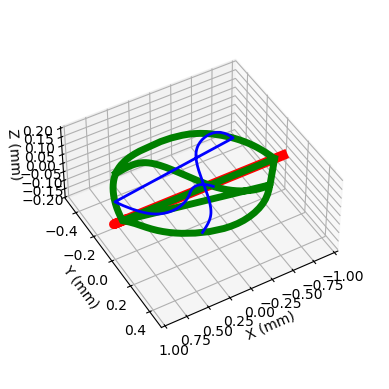

In [24]:
df_veins = df[df['r'] > 0]
df_venules = df[df['g'] > 0]
df_capillaries = df[df['b'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', )
ax.plot(df_veins['x'], df_veins['y'], df_veins['z'], c='red', lw=7)
ax.plot(df_venules['x'], df_venules['y'], df_venules['z'], c='green', lw=5)
ax.plot(df_capillaries['x'], df_capillaries['y'], df_capillaries['z'], c='blue', lw=2)

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_box_aspect([2,2,1], zoom=0.8)
ax.set_xlim(-1,1)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.2,0.2)
ax.view_init(elev=45, azim=60)


plt.show()

In [3]:
dx = df['x'].diff()
dy = df['y'].diff()
dz = df['z'].diff()

# Calculate the Euclidean distance between consecutive rows
distances = np.sqrt(dx**2 + dy**2 + dz**2)

# Display the results
print(distances)

0           NaN
1      0.100000
2      1.900000
3      0.100000
4      1.669435
         ...   
190    0.014130
191    0.014491
192    0.014869
193    0.015272
194    0.015710
Length: 195, dtype: float64


In [4]:
df['distance_to_next'] = distances

df

,x,y,z,r,g,b,distance_to_next
0,0.900000,0.000000,0.0,200,0,0,NaN
1,1.000000,0.000000,0.0,200,0,0,0.100000
2,-0.900000,0.000000,0.0,200,0,0,1.900000
3,-1.000000,0.000000,0.0,200,0,0,0.100000
4,0.639206,-0.316260,0.0,0,255,0,1.669435
...,...,...,...,...,...,...,...
190,-0.087749,-0.012726,0.0,0,0,255,0.014130
191,-0.100991,-0.006839,0.0,0,0,255,0.014491
192,-0.114177,0.000032,0.0,0,0,255,0.014869
193,-0.127244,0.007937,0.0,0,0,255,0.015272


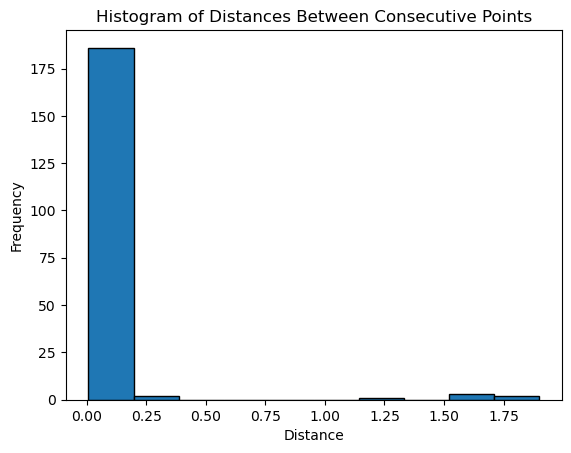

In [5]:
# Drop NaN values (usually the first value)
distances_no_nan = distances.dropna()

# Plot a histogram of the distances
plt.hist(distances_no_nan, bins=10, edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances Between Consecutive Points')
plt.show()

In [6]:
# Define the critical distance value
critical_distance = 0.75

# Find rows where distance_to_next is greater than the critical value
greater_than_critical = df[df['distance_to_next'] > critical_distance]

# Display the rows that meet the condition
print(greater_than_critical)

            x         y    z    r    g    b  distance_to_next
2   -0.900000  0.000000  0.0  200    0    0          1.900000
4    0.639206 -0.316260  0.0    0  255    0          1.669435
35   0.900000  0.000000  0.0    0  255    0          1.562843
76   0.900000  0.000000  0.0    0  255    0          1.800000
102  0.284209  0.273008  0.0    0    0  255          1.215271
152  0.840359 -0.137222  0.0    0    0  255          1.528889


In [7]:
df

,x,y,z,r,g,b,distance_to_next
0,0.900000,0.000000,0.0,200,0,0,NaN
1,1.000000,0.000000,0.0,200,0,0,0.100000
2,-0.900000,0.000000,0.0,200,0,0,1.900000
3,-1.000000,0.000000,0.0,200,0,0,0.100000
4,0.639206,-0.316260,0.0,0,255,0,1.669435
...,...,...,...,...,...,...,...
190,-0.087749,-0.012726,0.0,0,0,255,0.014130
191,-0.100991,-0.006839,0.0,0,0,255,0.014491
192,-0.114177,0.000032,0.0,0,0,255,0.014869
193,-0.127244,0.007937,0.0,0,0,255,0.015272


In [8]:
#isolate index values (row numbers) 
#how do you select between a range of row values? 
#eg select from the 35th to 75th 
#plot that 
#for loop - each line has a start and a stop index - goes through each start and stop index and plots that data frame 

In [9]:
filtered_df = df[df['distance_to_next'] > 0.75]

# Isolate the index values of the filtered DataFrame
index_values = filtered_df.index

# Display the index values
print(index_values)

Index([2, 4, 35, 76, 102, 152], dtype='int64')


In [10]:
# Select rows by integer-location
selected_rows_1 = df.iloc[0:2]  

print(selected_rows_1)

     x    y    z    r  g  b  distance_to_next
0  0.9  0.0  0.0  200  0  0               NaN
1  1.0  0.0  0.0  200  0  0               0.1


In [11]:
# Select rows by integer-location
selected_rows_2 = df.iloc[2:4]  

print(selected_rows_2)

     x    y    z    r  g  b  distance_to_next
2 -0.9  0.0  0.0  200  0  0               1.9
3 -1.0  0.0  0.0  200  0  0               0.1


In [12]:
# Select rows by integer-location
selected_rows_3 = df.iloc[4:35]  

print(selected_rows_3)

           x         y    z  r    g  b  distance_to_next
4   0.639206 -0.316260  0.0  0  255  0          1.669435
5   0.524999 -0.325767  0.0  0  255  0          0.114602
6   0.469349 -0.328661  0.0  0  255  0          0.055725
7   0.415263 -0.328740  0.0  0  255  0          0.054086
8   0.388947 -0.327354  0.0  0  255  0          0.026353
9   0.363189 -0.324822  0.0  0  255  0          0.025882
10  0.338045 -0.320995  0.0  0  255  0          0.025433
11  0.313571 -0.315726  0.0  0  255  0          0.025034
12  0.289823 -0.308870  0.0  0  255  0          0.024718
13  0.266825 -0.300415  0.0  0  255  0          0.024503
14  0.244562 -0.290528  0.0  0  255  0          0.024360
15  0.223012 -0.279393  0.0  0  255  0          0.024257
16  0.202157 -0.267191  0.0  0  255  0          0.024162
17  0.181977 -0.254104  0.0  0  255  0          0.024052
18  0.143564 -0.226006  0.0  0  255  0          0.047593
19  0.073964 -0.167147  0.0  0  255  0          0.091152
20 -0.046379 -0.057373  0.0  0 

In [13]:
# Select rows by integer-location
selected_rows_4 = df.iloc[35:76]  

print(selected_rows_4)

           x         y    z  r    g  b  distance_to_next
35  0.900000  0.000000  0.0  0  255  0          1.562843
36  0.890962 -0.032436  0.0  0  255  0          0.033671
37  0.879226 -0.064081  0.0  0  255  0          0.033752
38  0.864972 -0.094807  0.0  0  255  0          0.033871
39  0.848381 -0.124485  0.0  0  255  0          0.034001
40  0.829635 -0.152986  0.0  0  255  0          0.034114
41  0.808915 -0.180182  0.0  0  255  0          0.034190
42  0.786403 -0.205944  0.0  0  255  0          0.034212
43  0.762279 -0.230143  0.0  0  255  0          0.034169
44  0.736725 -0.252650  0.0  0  255  0          0.034052
45  0.709923 -0.273336  0.0  0  255  0          0.033857
46  0.682049 -0.292083  0.0  0  255  0          0.033591
47  0.653228 -0.308901  0.0  0  255  0          0.033369
48  0.623544 -0.323903  0.0  0  255  0          0.033259
49  0.593080 -0.337200  0.0  0  255  0          0.033240
50  0.561918 -0.348906  0.0  0  255  0          0.033288
51  0.530142 -0.359134  0.0  0 

In [14]:
# Select rows by integer-location
selected_rows_5 = df.iloc[76:102]  

print(selected_rows_5)

            x         y    z  r    g  b  distance_to_next
76   0.900000  0.000000  0.0  0  255  0          1.800000
77   0.874334  0.011924  0.0  0  255  0          0.028300
78   0.851000  0.024235  0.0  0  255  0          0.026383
79   0.809771  0.049616  0.0  0  255  0          0.048415
80   0.738207  0.100575  0.0  0  255  0          0.087854
81   0.701831  0.124591  0.0  0  255  0          0.043589
82   0.662780  0.147177  0.0  0  255  0          0.045112
83   0.620669  0.168440  0.0  0  255  0          0.047175
84   0.575120  0.188487  0.0  0  255  0          0.049765
85   0.525759  0.207427  0.0  0  255  0          0.052871
86   0.472207  0.225370  0.0  0  255  0          0.056478
87   0.351627  0.258354  0.0  0  255  0          0.125010
88   0.215687  0.285293  0.0  0  255  0          0.138584
89   0.068923  0.302771  0.0  0  255  0          0.147801
90  -0.007095  0.306892  0.0  0  255  0          0.076130
91  -0.084112  0.307365  0.0  0  255  0          0.077019
92  -0.161539 

In [15]:
# Select rows by integer-location
selected_rows_6 = df.iloc[102:152]  

print(selected_rows_6)

            x         y         z  r  g    b  distance_to_next
102  0.284209  0.273008  0.000000  0  0  255          1.215271
103  0.271205  0.274136  0.009016  0  0  255          0.015864
104  0.257993  0.274509  0.017101  0  0  255          0.015494
105  0.244631  0.274059  0.024315  0  0  255          0.015192
106  0.231176  0.272717  0.030720  0  0  255          0.014962
107  0.217684  0.270415  0.036376  0  0  255          0.014809
108  0.204215  0.267086  0.041346  0  0  255          0.014738
109  0.190824  0.262661  0.045689  0  0  255          0.014757
110  0.184177  0.260016  0.047646  0  0  255          0.007417
111  0.177570  0.257071  0.049468  0  0  255          0.007459
112  0.171012  0.253818  0.051165  0  0  255          0.007515
113  0.164509  0.250249  0.052743  0  0  255          0.007584
114  0.158070  0.246354  0.054211  0  0  255          0.007668
115  0.151700  0.242126  0.055576  0  0  255          0.007766
116  0.145407  0.237556  0.056846  0  0  255          0

In [16]:
# Select rows by integer-location
selected_rows_7 = df.iloc[152:195]  

print(selected_rows_7)

            x         y    z  r  g    b  distance_to_next
152  0.840359 -0.137222  0.0  0  0  255          1.528889
153  0.792087 -0.091799  0.0  0  0  255          0.066283
154  0.741776 -0.051290  0.0  0  0  255          0.064592
155  0.691950 -0.016920  0.0  0  0  255          0.060530
156  0.667620 -0.002260  0.0  0  0  255          0.028405
157  0.643464  0.010774  0.0  0  0  255          0.027448
158  0.619281  0.022241  0.0  0  0  255          0.026765
159  0.594866  0.032202  0.0  0  0  255          0.026369
160  0.570018  0.040717  0.0  0  0  255          0.026267
161  0.544533  0.047847  0.0  0  0  255          0.026463
162  0.518210  0.053650  0.0  0  0  255          0.026956
163  0.490845  0.058188  0.0  0  0  255          0.027739
164  0.462248  0.061517  0.0  0  0  255          0.028790
165  0.432452  0.063620  0.0  0  0  255          0.029870
166  0.401677  0.064419  0.0  0  0  255          0.030785
167  0.370153  0.063834  0.0  0  0  255          0.031530
168  0.338106 

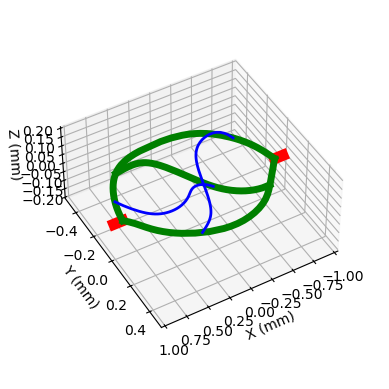

In [25]:
# Compute the distance to the next point
dx = df['x'].diff()
dy = df['y'].diff()
dz = df['z'].diff()

# Calculate the Euclidean distance between consecutive rows
distances = np.sqrt(dx**2 + dy**2 + dz**2)

df['distance_to_next'] = distances

# Drop NaN values (usually the first value)
distances_no_nan = distances.dropna()

# Define the critical distance value
critical_distance = 0.75

# Find rows where distance_to_next is greater than the critical value
greater_than_critical = df[df['distance_to_next'] > critical_distance]
splits = greater_than_critical.index.values
splits = np.insert(splits, 0, 0)

# Figure out the index of the last row
splits = np.append(splits, df.index[-1] + 1)

for n in range(0, len(splits)-1):
    selection = df.iloc[splits[n]:splits[n+1]]

#selection_veins = df[df['r'] > 0]
#selection_venules = df[df['g'] > 0]
#selection_rows_capillaries = df[df['b'] > 0]

# Define a function to determine colour and thickness based on r, g, b values
def determine_style(row_in):
    # capillaries
    if len(selection[selection['b'] > 0]) > 0:
        return 'blue', 2
    # venules
    elif len(selection[selection['g'] > 0]) > 0:
        return 'green', 5
    # veins 
    elif len(selection[selection['r'] > 0]) > 0:
        return 'red', 8 
    else:
        return 'black', 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for start, stop in zip(splits[:-1], splits[1:]):
    selection = df.iloc[start:stop]
    color, thickness = determine_style(selection)
    ax.plot(selection['x'], selection['y'], selection['z'], color=color, linewidth=thickness)

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_box_aspect([2,2,1], zoom=0.8)
ax.set_xlim(-1,1)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.2,0.2)
ax.view_init(elev=45, azim=60)

plt.show()


In [18]:
#I want to write a function in python, I have a data frame with 3 columns called r, g and b. if r > 0 
#i want to return two values colour and thickness, if g > 0 I want to return two different values of colour and thickness
#if b > 0, I want to return another two different values of colour and thickness



#figure out ranges for its self (dont define ranges) 
#generalise the code so it works for other colours (that Joe sends) 

# Define the ranges as a list of (start, stop) tuples
#ranges = [(0, 2), (2, 4), (4, 35), (35, 76), (76,102), (102,152), (152,195)]

In [19]:
# Find ranges where distance to the next point is greater than the critical distance
#ranges = find_distance_ranges(df, critical_distance)

# Plot each range
#for i, (start, stop) in enumerate(ranges):
    #selected_rows = df.iloc[start:stop]
    #c_in, t_in = determine_style(selected_rows)
    #ax.plot(selected_rows['x'], selected_rows['y'], selected_rows['z'], c=c_in, lw=t_in)
    #print(selected_rows)

In [20]:
def determine_style(row):
    # capillaries
    if row['b'] > 0:
        return 2
    # venules
    elif row['g'] > 0:
        return 5
    # veins 
    elif row['r'] > 0:
        return 8 
    else:
        return 1

def thickness_to_radius(thickness):
    # Assuming radius is proportional to thickness
    return thickness / 2

# Apply determine_style to get thickness
df['thickness'] = df.apply(determine_style, axis=1)

# Convert thickness to radius3
df['radius'] = df['thickness'].apply(thickness_to_radius)

df['e'] = np.pi * df['radius']**2 * df['distance_to_next']

df

,x,y,z,r,g,b,distance_to_next,thickness,radius,e
0,0.900000,0.000000,0.0,200,0,0,NaN,8,4.0,NaN
1,1.000000,0.000000,0.0,200,0,0,0.100000,8,4.0,5.026548
2,-0.900000,0.000000,0.0,200,0,0,1.900000,8,4.0,95.504417
3,-1.000000,0.000000,0.0,200,0,0,0.100000,8,4.0,5.026548
4,0.639206,-0.316260,0.0,0,255,0,1.669435,5,2.5,32.779289
...,...,...,...,...,...,...,...,...,...,...
190,-0.087749,-0.012726,0.0,0,0,255,0.014130,2,1.0,0.044391
191,-0.100991,-0.006839,0.0,0,0,255,0.014491,2,1.0,0.045526
192,-0.114177,0.000032,0.0,0,0,255,0.014869,2,1.0,0.046712
193,-0.127244,0.007937,0.0,0,0,255,0.015272,2,1.0,0.047979


In [21]:
def generate_gcode(df):
    gcode_lines = []

    # Define some starting commands if necessary
    gcode_lines.append("G21 ; Set units to millimeters")
    gcode_lines.append("G90 ; Absolute positioning")
    
    for index, row in df.iterrows():
        # Move to the start position
        gcode_lines.append(f"G0 X{row['x']} Y{row['y']} Z{row['z']} ; Move to start position")
        
        # Example of drawing or other operation
        # For simplicity, let's assume 'e' is used for setting extrusion or other properties
        gcode_lines.append(f"G1 E{row['e']} ; Set extrusion amount")
        
        # Move to another position or perform an action (for demonstration)
        gcode_lines.append(f"G1 X{row['x']+5} Y{row['y']} Z{row['z']} ; Move to another position")
    
    # Add end commands if necessary
    gcode_lines.append("M30 ; End of program")

    return "\n".join(gcode_lines)

# Generate the G-code
gcode = generate_gcode(df)

# Save to a file
with open("output.gcode", "w") as file:
    file.write(gcode)